In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import pickle
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import MultiPoint
import seaborn as sns
sns.set(style="whitegrid")


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# def CreateSQLTable(sqltablename, df):
#     SqlDtype = ''
#     ret_str = 'CREATE TABLE ' + sqltablename + ' (\n'
#     for col in df:
#         if df[col].dtype == 'int64':
#             SqlDtype = 'INT'
#         if df[col].dtype == 'float64':
#             SqlDtype = 'DOUBLE PRECISION'
#         if df[col].dtype == 'object':
#             SqlDtype = 'TEXT'
#         ret_str = ret_str + col + '\t' + SqlDtype + ',' + '\n'
#     ret_str = ret_str[:-2] + ');'
#     return print(ret_str)

In [3]:

cnx = create_engine('postgresql://postgres@localhost:5432/postgres')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
df=pd.read_sql_query('''SELECT A.usertype, A.startstationid, A.endstationid, B.id, B.names FROM stationids B RIGHT JOIN biketrips A ON A.startstationid=B.id;''',cnx)

In [5]:
df.head()

,usertype,startstationid,endstationid,id,names
0,Subscriber,3226,3165,3226.0,W 82 St & Central Park West
1,Subscriber,3263,498,3263.0,Cooper Square & Astor Pl
2,Customer,3143,3152,3143.0,5 Ave & E 78 St
3,Customer,3143,3152,3143.0,5 Ave & E 78 St
4,Customer,3143,3152,3143.0,5 Ave & E 78 St


In [6]:
df.dropna(axis=0, how='any',inplace=True)
df['usertype']=[x.strip() for x in df['usertype']]

In [7]:
df_cus=df[df['usertype']=="Customer"]
df_sub=df[df['usertype']=='Subscriber']

In [32]:
#GET TOP SUBSCRIBER STATIONS
subscriber_start_popular=pd.DataFrame(df_sub.groupby('id')['names'].count().sort_values(ascending=False))
subscriber_end_popular=pd.DataFrame(df_sub.groupby('endstationid')['names'].count().sort_values(ascending=False))
subscriber_end_popular=subscriber_end_popular.reset_index().rename(columns={'endstationid':'id'})
subscriber_end_popular=subscriber_end_popular.set_index(['id'])
top_sub_stations=subscriber_start_popular.join(subscriber_end_popular, lsuffix="start", sort=True)
top_sub_stations['count']=top_sub_stations['namesstart']+top_sub_stations['names']
top_sub_stations=top_sub_stations.drop(columns=['namesstart','names'])
top_sub_stations=top_sub_stations.sort_values(by='count', ascending=False)

In [62]:
top_sub_stations.to_csv("topsubscriberstations.csv")

In [48]:
#GET TOP CUSTOMER STATIONS
customer_start_popular=pd.DataFrame(df_cus.groupby('id')['names'].count().sort_values(ascending=False))
customer_end_popular=pd.DataFrame(df_cus.groupby('endstationid')['names'].count().sort_values(ascending=False))
customer_end_popular=customer_end_popular.reset_index().rename(columns={'endstationid':'id'})
customer_end_popular=customer_end_popular.set_index(['id'])
top_cust_stations=customer_start_popular.join(customer_end_popular, lsuffix="start", sort=True)
top_cust_stations['count']=top_cust_stations['namesstart']+top_cust_stations['names']
top_cust_stations=top_cust_stations.drop(columns=['namesstart','names'])
top_cust_stations=top_cust_stations.sort_values(by='count', ascending=False)

In [61]:
top_cust_stations.to_csv("topcustomerstations.csv")

In [54]:
names=pd.read_csv("allstations.csv")
names.set_index(names['id'],inplace=True)

In [55]:
topsub=top_sub_stations.head(10).join(names).drop(columns=['Unnamed: 0','latitude','longitude','id']).rename(columns={'subscriberstationcount':'count',"name":"station"})

Text(0.5,1,'Top Subscriber Stations')

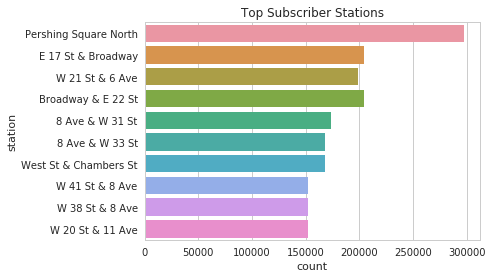

In [57]:
sns.barplot(x="count", y="station", data=topsub,
            label="Total")
plt.title("Top Subscriber Stations")

In [59]:
top_cust=top_cust_stations.head(10).join(names).drop(columns=['Unnamed: 0','latitude','longitude','id']).rename(columns={'customerstationcount':'count',"name":"station"})

Text(0.5,1,'Top Customer Stations')

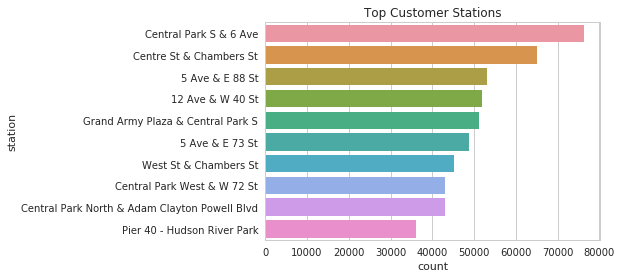

In [60]:
sns.barplot(x="count", y="station", data=top_cust,
            label="Total")
plt.title("Top Customer Stations")